In [1]:
from keras.src.utils import to_categorical

from hyperparamaters import TrainHyperparameters, ArchitectureHyperparameters
from model_builder import ModelBuilder
import tensorflow as tf


2025-03-25 15:53:17.896693: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 15:53:17.900515: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 15:53:17.913140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742917997.934862    6788 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742917997.941326    6788 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742917997.957544    6788 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
class MyModelBuilder(ModelBuilder):
    def model_building_function(self, callbacks=None) -> tf.keras.Model:
        classes = self.model_trainer.get_classes()

        flatten_layer = tf.keras.layers.Flatten(input_shape=self.model_trainer.get_input_shape())
        layers = [flatten_layer]

        for i in range(self.architecture_hp.layer_count):
            layers.append(tf.keras.layers.Dense(
                self.architecture_hp.layer_count,
                activation=self.architecture_hp.activation_function)
            )
        layers.append(tf.keras.layers.Dense(classes, activation='softmax'))

        model = tf.keras.models.Sequential(layers)
        return model

    @staticmethod
    def data_function(data_function = None):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        return (x_train, to_categorical(y_train)), (x_test, to_categorical(y_test))


In [30]:
train_hp = TrainHyperparameters(
        epochs=10,
    )
architecture_hp = ArchitectureHyperparameters(
        neurons_per_layer_count= 50,
        layer_count= 5,
        activation_function="relu"
    )
model_builder = (MyModelBuilder()
                     .set_hyper_parameters(architecture_hp,train_hp)
                     .set_model_trainer()
                     )
model = model_builder.build_model()

Epoch 1/10


/home/wojtek/PycharmProjects/tf_dl/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1592 - loss: 2.2070 - val_accuracy: 0.3716 - val_loss: 1.5059
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4358 - loss: 1.3976 - val_accuracy: 0.6370 - val_loss: 1.0479
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6452 - loss: 1.0402 - val_accuracy: 0.6809 - val_loss: 0.9473
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7101 - loss: 0.8977 - val_accuracy: 0.7272 - val_loss: 0.8363
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7247 - loss: 0.8363 - val_accuracy: 0.7374 - val_loss: 0.8211
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7323 - loss: 0.8164 - val_accuracy: 0.7407 - val_loss: 0.7930
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7409 - loss: 0.7863 - val_accuracy: 0.7602 - val_loss: 0.7780
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7604 - loss: 0.7648 - val_accurac

In [2]:
import matplotlib.pyplot as plt

def plot_digit(image, label=None):
    plt.imshow(image, cmap="gray")  # Plot in grayscale
    title = f"Digit: {label}" if label is not None else "Digit"
    plt.title(title)
    plt.axis("off")  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]]


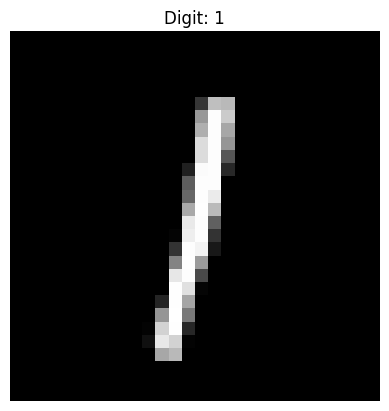

In [39]:
import numpy as np
x_test, y_test = model_builder.get_test_set()
sample_index = 2137
sample_x = tf.expand_dims(x_test[sample_index], axis=0)
sample_y = tf.expand_dims(y_test[sample_index], axis=0)

prediction = model.predict(sample_x)
np.set_printoptions(formatter={'float': '{:.3f}'.format})

print(prediction)
plot_digit(
    x_test[sample_index],
    np.argmax(y_test[sample_index])
)